# Troy Quicksall
# Random Forest Regression to Predict Miles per Gallon of Vehicles

## 1. Loading the data as a Pandas dataframe

In [1]:
# importing libraries and auto-mpg.csv
import pandas as pd

auto_mpg_df = pd.read_csv('auto-mpg.csv')

auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 2. Prepping the data for modeling

### Remove car name column

In [2]:

auto_mpg_df = auto_mpg_df.drop(['car name'], axis=1)

auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### The horsepower column values imported as a string data type. Replacing any strings with the column mean.

In [3]:
# horsepower is string due to non-numeric values (?)
# I will replace all non-numerics with nan and then replace nan with the mean

import numpy as np
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].replace(r'\D+', np.nan, regex=True)


auto_mpg_df['horsepower'] = pd.to_numeric(auto_mpg_df['horsepower'])

mean_value = auto_mpg_df['horsepower'].mean()

auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].replace(np.nan, mean_value, regex=True)

auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


### Creating dummy variables for the origin column

In [4]:
# Creates dummy variables (1, 2, 3) from origin column
auto_mpg_df = pd.get_dummies(auto_mpg_df, columns=['origin'], prefix='origin')
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


## 3. Creating a correlation coefficient matrix and/or visualization

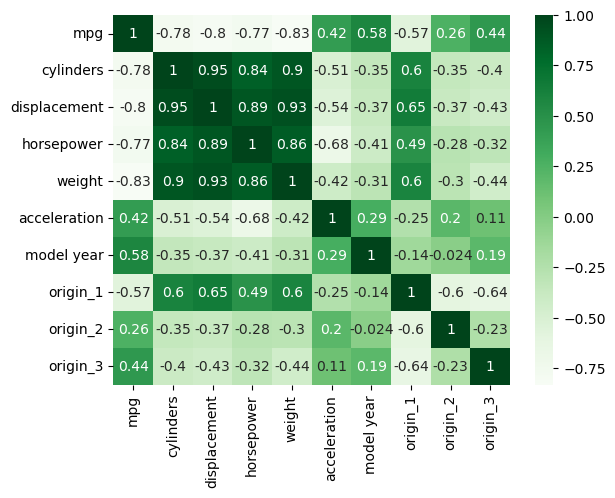

In [5]:
correlation_mat = auto_mpg_df.corr()

# Creating matplotlib visualization
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(correlation_mat, cmap="Greens", annot=True)
plt.show()

From the matrix we can see there is some positive correlation between model year, origin_3, and acceleration. There is strong negative correlation with cylinders, displacement, horsepower, and weight.

### 4. Plotting mpg versus weight

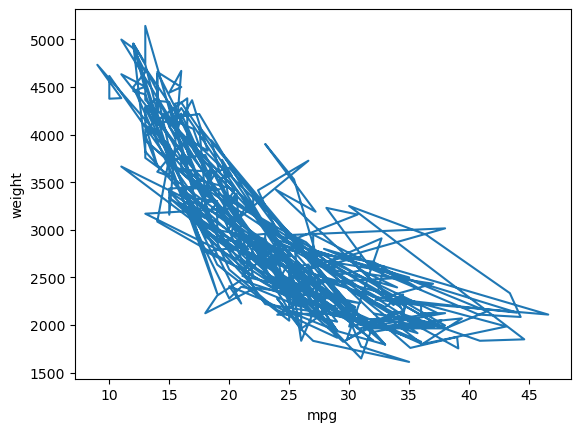

In [6]:
plt.plot(auto_mpg_df['mpg'], auto_mpg_df['weight'])
plt.xlabel('mpg')
plt.ylabel('weight')
plt.show()

As the plot shows there is a strong trend as weight goes up, mpg goes down. This indicates a strong negative relationship and explains the large negative coefficient of -0.83.

## 5. Randomly splitting the data into 80% training data and 20% test data, where target is mpg.

In [7]:
# Creating x data of all variables not the target and separate target_data
x_data = auto_mpg_df.drop(['mpg'], axis=1)
target_data = auto_mpg_df['mpg']

In [8]:
# splitting the data using sklearn
from sklearn.model_selection import train_test_split

# using 20% as test size 
x_train, x_test, target_train, target_test = train_test_split(x_data, target_data, test_size=0.2, random_state=42)

## 6. Training an ordinary linear regression on the training data.

In [9]:
from sklearn.linear_model import LinearRegression



linear_regression = LinearRegression()

In [10]:
# Training the linear regression model using train data

linear_regression.fit(x_train, target_train)

LinearRegression()

In [11]:
# creating prediction from test set using the model

predictions = linear_regression.predict(x_test)
predictions_train = linear_regression.predict(x_train)

## 7. Calculating R2, RMSE, and MAE on both the training and test sets

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# calculating the r2, rmse, and mae using sklearn metrics
r2_test = r2_score(target_test, predictions)
rmse_test = mean_squared_error(target_test, predictions)
mae_test = mean_absolute_error(target_test, predictions)

# same for train data
r2_train = r2_score(target_train, predictions_train)
rmse_train = mean_squared_error(target_train, predictions_train)
mae_train = mean_absolute_error(target_train, predictions_train)
print('R2 of test: ', r2_test)
print('RMSE of test: ', rmse_test)
print('MAE of test', mae_test)

print('R2 of train: ', r2_train)
print('RMSE of train: ', rmse_train)
print('MAE of train', mae_train)

R2 of test:  0.8449006123776617
RMSE of test:  8.3391425002559
MAE of test 2.287586770442106
R2 of train:  0.8188288951042786
RMSE of train:  11.358743895785453
MAE of train 2.6054846937710354


The R2, RMSE, and MAE metrics are all similar between the test and the train set. This is a good sign our model is NOT overfit and only generating accurate predicitions on the train set. Our R2 value is high(0-1 scale) meaning the variance of our target can be explained by the predictors. Our mean squared and absolute errors are relatively low meaning there is low distance between the predicted and actual values. 

## 8. Picking another regression model and repeat the previous two steps

In [13]:
# Using Random Forest regression model from sklearn
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

# Fitting the model on the train data
rf_model.fit(x_train, target_train)

RandomForestRegressor()

In [14]:
# creating prediction from test and train set using the model

rf_predictions = rf_model.predict(x_test)
rf_predictions_train = rf_model.predict(x_train)

In [15]:
# calculating the r2, rmse, and mae using sklearn metrics
rf_r2_test = r2_score(target_test, rf_predictions)
rf_rmse_test = mean_squared_error(target_test, rf_predictions)
rf_mae_test = mean_absolute_error(target_test, rf_predictions)

# same for train data
rf_r2_train = r2_score(target_train, rf_predictions_train)
rf_rmse_train = mean_squared_error(target_train, rf_predictions_train)
rf_mae_train = mean_absolute_error(target_train, rf_predictions_train)
print('R2 of test: ', rf_r2_test)
print('RMSE of test: ', rf_rmse_test)
print('MAE of test', rf_mae_test)

print('R2 of train: ', rf_r2_train)
print('RMSE of train: ', rf_rmse_train)
print('MAE of train', rf_mae_train)

R2 of test:  0.9116593267803769
RMSE of test:  4.749763837499998
MAE of test 1.6221124999999996
R2 of train:  0.9802465334072081
RMSE of train:  1.2384677358490572
MAE of train 0.7402264150943388


As can be seen the random forest regression model fits better than the oridinary linear regression model. The R2 value is higher meaning more variance in the target can be determined from the predictors, and there are lower error scores indicating a closer distance between predicted and actual values.